In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
warnings.warn("once")
%matplotlib inline
#color = sns.color_palette()

# Graph 한글 표시, https://lsh-story.tistory.com/83
import matplotlib
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="./korean.ttf").get_name()
rc('font',family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

print('Python version : ', sys.version)

Python version :  3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


# 1. 정형 데이터마이닝 (사용 데이터 : lotto)

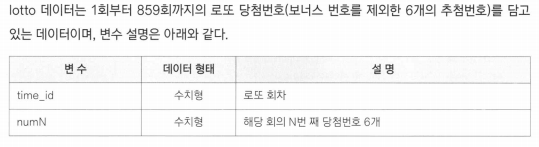

### 1) 연관규칙분석을 수행하기 위해 lotto 데이터셋을 transaction 데이터로 변환하시오. 
###     단, 본 분석에서 로또번호가 추첨된 순서는 고려하지 않고 분석을 수행하도록 한다. 
###     그리고 변환된 데이터에서 가장 많이 등장한 
###     상위 10개의 로또번호를 막대그래프로 출력하고 이에 대해 설명하시오.

    - 1.1.1) Transaction Data
        - transaction data == n Hot Encoding
        - get_dummies      == 1 Hot Encoding    
    - 1.1.2) 상위10개 로또번호, 막대그래프 

### 2) 변환한 데이터에 대해 apriori함수를 사용하여 다음 괄호 안의 조건을 반영하여 
###     연관규칙을 생성하고, 이를 ‘rules_1’이라는 변수에 저장하여 결과를 해석하시오. 
###     (최소 지지도 : 0.002, 최소 신뢰도 : 0.8, 최소조합 항목 수 : 2개, 최대조합 항목 수 : 6개) 
###     그리고 도출된 연관규칙들을 향상도를 기준으로 내림차순 정렬하여 상위 30개의 규칙을 확인하고, 
###     이를 데이터프레임으로 변환하여 csv파일로 출력하시오.  
    1.2.1) rules_1
    1.2.2) 향상도 상위 30개, csv

### 3) 생성된 연관규칙 'rules_1'에 대한 정보를 해석하고, Q1)을 통해 확인했을 때 
###     가장 많이 추첨된 번호가 우측항에 존재하는 규칙들만을 'rules_most_freq'라는 변수에 
###     저장하시오. 그리고 해당 규칙들을 해석하여 인사이트를 도출한 후 서술하시오.
    - 1.3.1) rules_1 해석
    - 1.3.2) rules_most_freq 도출, 해석, 인사이트
    

### 1.1.1) Transaction Data
- transaction data == n Hot Encoding
- get_dummies.... == 1 Hot Encoding

In [2]:
from mlxtend.preprocessing import TransactionEncoder  # Encoder 

In [3]:
df = pd.read_csv('./dataset/lotto.csv')
df

,time_id,num1,num2,num3,num4,num5,num6
0,859,8,22,35,38,39,41
1,858,9,13,32,38,39,43
2,857,6,10,16,28,34,38
3,856,10,24,40,41,43,44
4,855,8,15,17,19,43,44
...,...,...,...,...,...,...,...
854,5,16,24,29,40,41,42
855,4,14,27,30,31,40,42
856,3,11,16,19,21,27,31
857,2,9,13,21,25,32,42


In [4]:
df.drop('time_id', axis=1)

,num1,num2,num3,num4,num5,num6
0,8,22,35,38,39,41
1,9,13,32,38,39,43
2,6,10,16,28,34,38
3,10,24,40,41,43,44
4,8,15,17,19,43,44
...,...,...,...,...,...,...
854,16,24,29,40,41,42
855,14,27,30,31,40,42
856,11,16,19,21,27,31
857,9,13,21,25,32,42


In [5]:
nums = df.drop('time_id', axis=1).values
print(type(nums), nums.shape)
nums

<class 'numpy.ndarray'> (859, 6)


array([[ 8, 22, 35, 38, 39, 41],
       [ 9, 13, 32, 38, 39, 43],
       [ 6, 10, 16, 28, 34, 38],
       ...,
       [11, 16, 19, 21, 27, 31],
       [ 9, 13, 21, 25, 32, 42],
       [10, 23, 29, 33, 37, 40]])

In [6]:
# TransactionEncoder
te = TransactionEncoder()  
buf = te.fit(nums).transform(nums)

# array -> df
dft = pd.DataFrame(buf, columns=te.columns_)  # dft = df_transaction
print(dft.shape)
dft

(859, 45)


,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
0,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,False,False,True,False,False
2,False,False,False,False,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,True,False,True,True,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,False,False,False
855,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
856,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
857,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


### * Memo
r, mlxtend는 transaction 전처리가 필요하지만, apyori package는 필요 없음 (그래도 일단 구현함)

### 1.1.2) 상위10개 로또번호, 막대그래프 

In [7]:
df

,time_id,num1,num2,num3,num4,num5,num6
0,859,8,22,35,38,39,41
1,858,9,13,32,38,39,43
2,857,6,10,16,28,34,38
3,856,10,24,40,41,43,44
4,855,8,15,17,19,43,44
...,...,...,...,...,...,...,...
854,5,16,24,29,40,41,42
855,4,14,27,30,31,40,42
856,3,11,16,19,21,27,31
857,2,9,13,21,25,32,42


In [8]:
dfm = df.melt('time_id')  # df_melt, 고정행 제외값 merge(variable,value형태로)
dfm

,time_id,variable,value
0,859,num1,8
1,858,num1,9
2,857,num1,6
3,856,num1,10
4,855,num1,8
...,...,...,...
5149,5,num6,42
5150,4,num6,42
5151,3,num6,31
5152,2,num6,42


In [9]:
dfg = dfm.groupby('value')[['variable']].count() # df_groupby
print(type(dfg),dfg.shape)
dfg.head()

<class 'pandas.core.frame.DataFrame'> (45, 1)


,variable
value,
1,122
2,112
3,111
4,115
5,119


In [10]:
df10 = dfg.sort_values(by='variable', ascending=False)[:10].reset_index()
df10

,value,variable
0,34,134
1,40,126
2,27,126
3,43,125
4,20,124
5,17,123
6,12,123
7,1,122
8,14,122
9,10,122


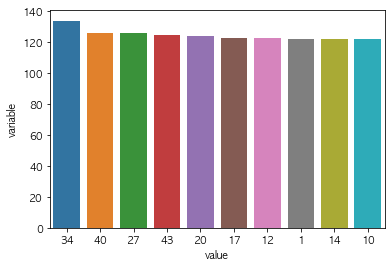

In [11]:
sns.barplot(data = df10, 
            x = 'value',
            y = 'variable', 
            order = df10['value']) #order미지정시, x의 오름차순 정렬됨(1,10,12...)

### * 해석
대부분의 번호가 비슷한 빈도로 추첨되었고, 34번이 가장 많이 추첨 되었다.